In [1]:
library(Rbeast)
library(ncdf4) # package for netcdf manipulation
library(raster) # package for raster manipulation
library(rgdal) # package for geospatial analysis
library(ggplot2) # package for plotting
library(xts)

Loading required package: sp

Please note that rgdal will be retired by the end of 2023,
plan transition to sf/stars/terra functions using GDAL and PROJ
at your earliest convenience.

rgdal: version: 1.5-32, (SVN revision 1176)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.0.4, released 2020/01/28
Path to GDAL shared files: /usr/share/gdal
GDAL binary built with GEOS: TRUE 
Loaded PROJ runtime: Rel. 7.0.0, March 1st, 2020, [PJ_VERSION: 700]
Path to PROJ shared files: /data/home/hamiddashti/.local/share/proj:/usr/share/proj
PROJ CDN enabled: FALSE
Linking to sp version:1.5-0
To mute warnings of possible GDAL/OSR exportToProj4() degradation,
use options("rgdal_show_exportToProj4_warnings"="none") before loading sp or rgdal.

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




flaskdf

Warning message in beast(sample_lai, opt):
“Switching to the old interface of Rbeast v0.2: beast(Y,opt)
”


On the first run,check the CPU instruction set ... 

15
CPU Vendor:
    AMD=No
    Intel=Yes
 
OS Features:
    OS AVX=Yes
    OS AVX512=No

Hardware Features:
    MMX=Yes
    x64=Yes
    ABM=Yes
    RDRAND=Yes
    RDSEED=No
    BMI1=Yes
    BMI2=Yes
    ADX=No
    MPX=No
    PREFETCHW=No
    PREFETCHWT1=No
    RDPID=No
    GFNI=No
    VAES=No

SIMD: 128-bit
    SSE=Yes
    SSE2=Yes
    SSE3=Yes
    SSSE3=Yes
    SSE4a=No
    SSE4.1=Yes
    SSE4.2=Yes
    AES-NI=Yes
    SHA=No

SIMD: 256-bit
    AVX=Yes
    XOP=No
    FMA3=Yes
    FMA4=No
    AVX2=Yes

SIMD: 512-bit
    AVX512-F=No
    AVX512-CD=No
    AVX512-PF=No
    AVX512-ER=No
    AVX512-VL=No
    AVX512-BW=No
    AVX512-DQ=No
    AVX512-IFMA=No
    AVX512-VBMI=No
    AVX512-VPOPCNTDQ=No
    AVX512-4FMAPS=No
    AVX512-4VNNIW=No
    AVX512-VBMI2=No
    AVX512-VPCLMUL=No
    AVX512-VNNI=No
    AVX512-BITALG=No
    AVX512-BF16=No

Summary
    Safe to use AVX:     Yes
    Safe to use AVX512:  No

Cache ID 0:
- Level: 1
- Type: Data C

Warning message in beast.old(y, opt):
“WARNING: when metadata$isRegualrOrdered=TRUE,the input data is assumed to be regular and ordered in time AND the times of individual datapoints are determined fully by 'metadata$startTime' and 'metadata$deltaTime'. But metadata$startTime and deltaTime are missing and a default value 1 is used for both!”



#--------------------------------------------------#
#      OPTIONS used in the MCMC inference          #
#--------------------------------------------------#
#  Set extra$printOptions=0 to suppress printing   #
#--------------------------------------------------#

#......Start of displaying 'MetaData' ......
  metadata = list()
  metadata$isRegularOrdered = TRUE
  metadata$season           = 'harmonic'
  metadata$period           = 24.000000
  metadata$startTime        = 1.00000
  metadata$deltaTime        = 1.00000
  metadata$whichDimIsTime   = 1
  metadata$missingValue     = NaN
  metadata$maxMissingRate   = 0.7500
  metadata$deseasonalize    = FALSE
  metadata$detrend          = FALSE
#........End of displaying MetaData ........

#......Start of displaying 'prior' ......
  prior = list()
  prior$modelPriorType	  = 1
  prior$seasonMinOrder   = 1
  prior$seasonMaxOrder   = 11
  prior$seasonMinKnotNum = 0
  prior$seasonMaxKnotNum = 1
  prior$seasonMinSepDist = 12
  prior$trendMinOrde

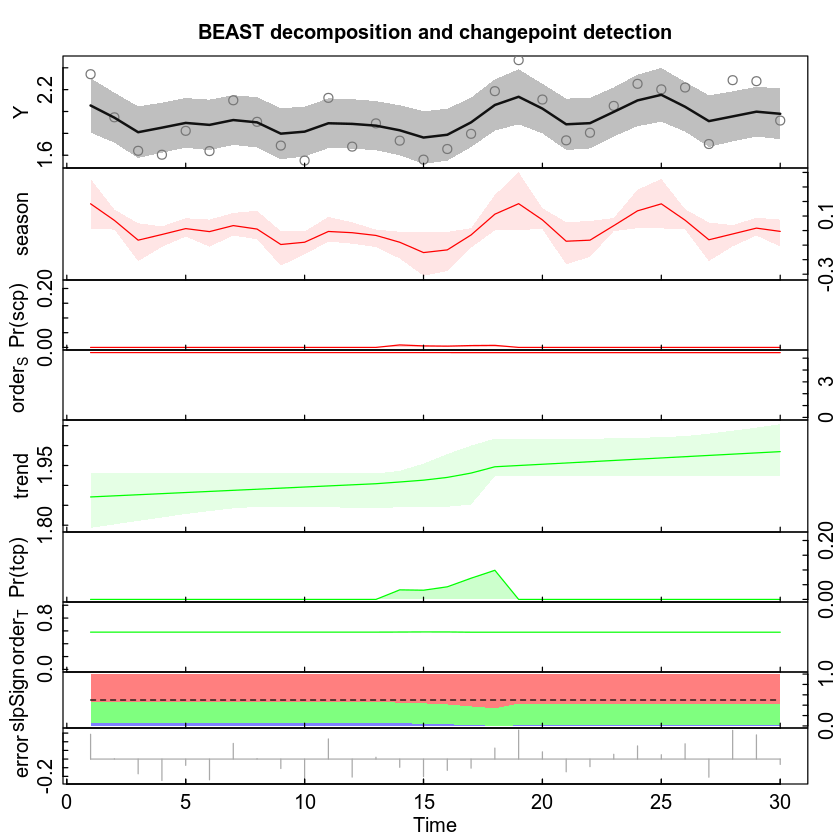

In [2]:
nc_data = nc_open("/data/home/hamiddashti/hamid/nasa_above/greeness/data/processed_data/noaa_nc/lai_fapar/resampled/lai_growing.nc")
lai_growing <- ncvar_get(nc_data, "LAI") # store the data in a 3-dimensional array
mean_lai <- apply(lai_growing, 3,mean,na.rm = TRUE)

n <- 1984:2013

opt=list()
# opt$period=1
# opt$start=1984
# # opt$deltat=1
# out <- beast(mean_lai,opt)
# plot(out,index=n )
# axis(1,at=n,labels=str(n))

sample_lai <- lai_growing[1026,428,]
opt=list()
opt$period=24
opt$start=1984
opt$deltat=1
opt$season="none"
out <- beast(sample_lai,opt)
plot(out)
